<a href="https://colab.research.google.com/github/mairapineda/Deep_Learning/blob/main/P1_EXAMEN_FIINAL_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texto en cursiva*#Quienes somos:


*   Maira Alejandra Pineda Fuquen
*   Fabian Camilo Salamanca R
*   Rafael Esteban Torres
*   William David Otálora Moreno
*   Juan David Duarte

---
Origen de la data:
https://www.datos.gov.co/Estad-sticas-Nacionales/Entradas-de-extranjeros-a-Colombia/96sh-4v8d/data




#P0. importar librerias (5%)

##P0.1 librerias genericas

In [150]:
#Librerias generales para administración de la data
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
import seaborn as sb
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D              
from bs4 import BeautifulSoup          # libreria para parsear documentos HTML

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##P0.2 librerias para Machine learning

In [151]:
#Librerias especializadas para hacer machine learning (k-means y/o otros)
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics
from sklearn.model_selection import train_test_split

#P1. importando dataset (5%)

In [152]:
#deben descargar la data desde  https://www.datos.gov.co y cargarlo en sus respectivos GITHUB y desde el raw hacer la importación de la Data
# en caso que DATASET sea muy grande y no pueda cargarlo a GITHUB, cargarlo a GOOGLE DRIVE.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [153]:
df_entrada=pd.read_csv("/content/gdrive/MyDrive/IA/Entradas_de_extranjeros_a_Colombia.csv")
df_entrada.head()

,Año,Mes,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Indefinido,Total,Latitud - Longitud
0,2012,Enero,Islas Alboran y Perejil,99999,1,0,NaN,1,"(4.697144,-74.140516)"
1,2012,Enero,Albania,8,1,2,NaN,3,"(4.697144,-74.140516)"
2,2012,Enero,Alemania,276,11,16,NaN,27,"(-4.197703,-69.941278)"
3,2012,Enero,Alemania,276,1,1,NaN,2,"(0.25129,-76.875963)"
4,2012,Enero,Alemania,276,63,102,NaN,165,"(0.814836,-77.662532)"


#P2.Conociendo y normalizando los datos (30%)


###P2.0 generales (10%)

---
*   dimensiones del dataframe
*   existen columnas con nulos?
*   todos las columnas son númericos?
*   existen valores negativos?...si existen que hacemos con ellos?


In [154]:
print(df_entrada.info())
print("_____________describe________\n",df_entrada.describe())
print("_____________nulos?__________\n",df_entrada.isnull().sum())
print("_____________cols,rows__________\n",df_entrada.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112293 entries, 0 to 112292
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Año                 112293 non-null  int64  
 1   Mes                 112293 non-null  object 
 2   Nacionalidad        112293 non-null  object 
 3   Codigo Iso 3166     112293 non-null  int64  
 4   Femenino            112293 non-null  int64  
 5   Masculino           112293 non-null  int64  
 6   Indefinido          0 non-null       float64
 7   Total               112293 non-null  int64  
 8   Latitud - Longitud  112293 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 7.7+ MB
None
_____________describe________
                  Año  Codigo Iso 3166       Femenino      Masculino  \
count  112293.000000    112293.000000  112293.000000  112293.000000   
mean     2016.273534      1769.711184      91.231493     128.504261   
std         2.690334     1148

##P2.1 Normalizando los datos (50%)

###P2.1.1 Convertir datos object (Categoricos o Text) en Data Numerica/DateTime

In [155]:
df_entrada['Mes']=df_entrada['Mes'].str.replace('Enero','01')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Febrero','02')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Marzo','03')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Abril','04')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Mayo','05')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Junio','06')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Julio','07')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Agosto','08')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Septiembre','09')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Octubre','10')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Noviembre','11')
df_entrada['Mes']=df_entrada['Mes'].str.replace('Diciembre','12')
df_entrada['Mes']=pd.to_numeric(df_entrada['Mes'])

df_entrada['Nacionalidad'] = df_entrada['Nacionalidad'].astype('category')
df_entrada['Nacionalidad'] = df_entrada['Nacionalidad'].cat.codes 

df_entrada['Fecha']=df_entrada['Año'].apply(str)+'/'+df_entrada['Mes'].apply(str)+'/01'
df_entrada['Fecha']=pd.to_datetime(df_entrada['Fecha'],yearfirst=True)




print(df_entrada.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112293 entries, 0 to 112292
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Año                 112293 non-null  int64         
 1   Mes                 112293 non-null  int64         
 2   Nacionalidad        112293 non-null  int16         
 3   Codigo Iso 3166     112293 non-null  int64         
 4   Femenino            112293 non-null  int64         
 5   Masculino           112293 non-null  int64         
 6   Indefinido          0 non-null       float64       
 7   Total               112293 non-null  int64         
 8   Latitud - Longitud  112293 non-null  object        
 9   Fecha               112293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int16(1), int64(6), object(1)
memory usage: 7.9+ MB
None


###P2.1.2 normalizar todos los datos numericos entre [0, 1].

In [156]:
#min_max_scaler= preprocessing.MinMaxScaler()
#df_entrada=min_max_scaler.fit_transform(df_entrada)
#df_entrada=pd.DataFrame(df_entrada)
#df_entrada=df_entrada.rename(columns={0:'Año',1:'Mes',2:'Nacionalidad',3:'Codigo Iso 3166',4:'Femenino',5:'Masculino',6:'Total'})


###P2.1.3 exportando Data a un CSV con los arreglos (si son necesarios).

In [157]:
df_entrada.to_csv('Entrada_de_extrangeros.csv',index_label='row')


###P2.1.4 eliminar columnas que no usaremos (object) 

In [158]:
df_entrada.drop(['Latitud - Longitud', 'Fecha'], axis=1, inplace=True)
print(df_entrada.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112293 entries, 0 to 112292
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Año              112293 non-null  int64  
 1   Mes              112293 non-null  int64  
 2   Nacionalidad     112293 non-null  int16  
 3   Codigo Iso 3166  112293 non-null  int64  
 4   Femenino         112293 non-null  int64  
 5   Masculino        112293 non-null  int64  
 6   Indefinido       0 non-null       float64
 7   Total            112293 non-null  int64  
dtypes: float64(1), int16(1), int64(6)
memory usage: 6.2 MB
None


In [159]:
dates = df_entrada['Indefinido']
df_entrada = df_entrada.drop('Indefinido', 1) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


##P2.2 graficando datos (40%)

---

*   Gráficos circulares 
*   Gráfico de dispersión (k-means) 
*   Histogramas
*   uso de sabana de Graficas con seaborn
*   Gráfico de historico (matplotlib.legend)
*   matriz de correlación




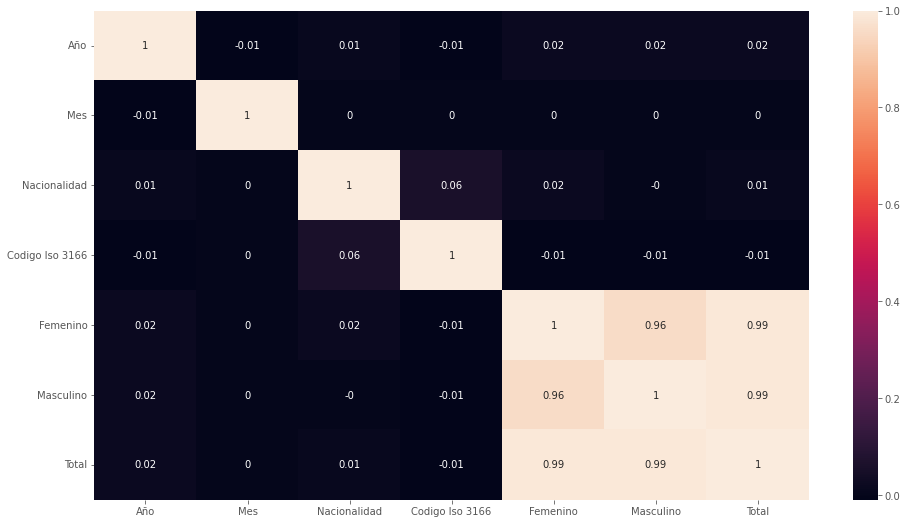

In [135]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = df_entrada.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

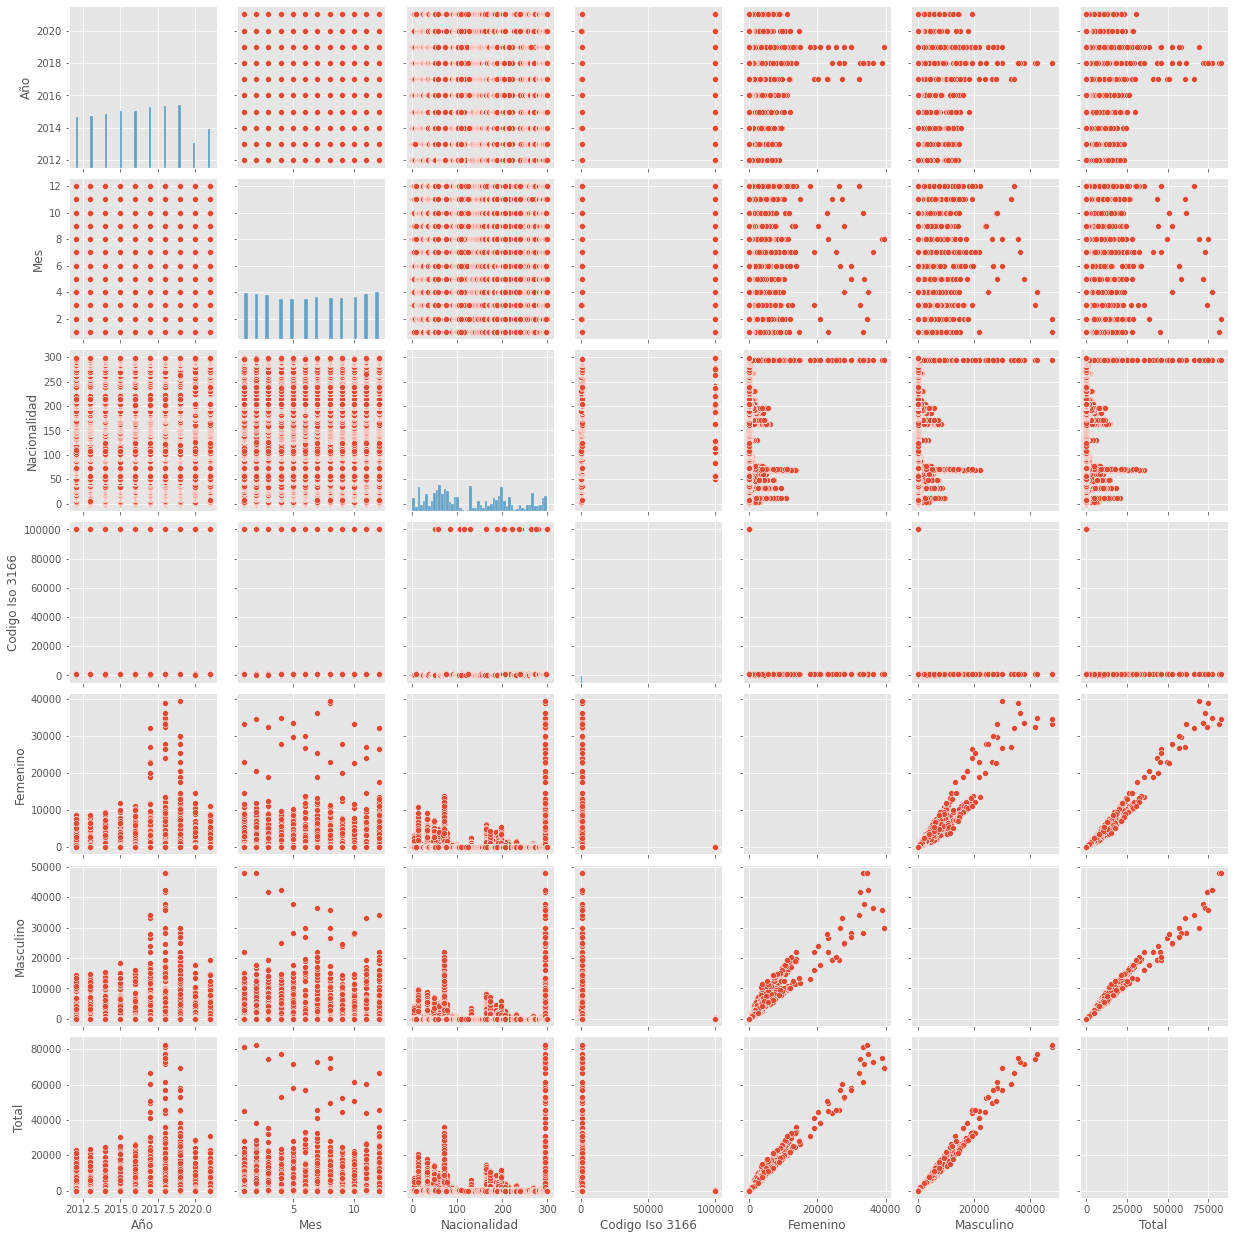

In [136]:
sns.pairplot(df_entrada)

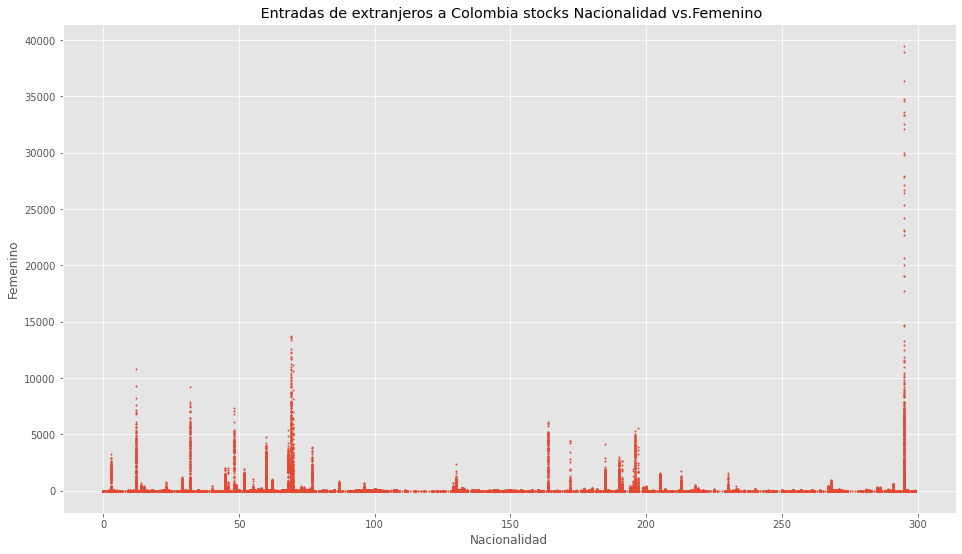

In [137]:
x = df_entrada['Nacionalidad'].values
y = df_entrada['Femenino'].values
plt.xlabel('Nacionalidad')
plt.ylabel('Femenino')
plt.title(' Entradas de extranjeros a Colombia stocks Nacionalidad vs.Femenino')
plt.plot(x,y,'o',markersize=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


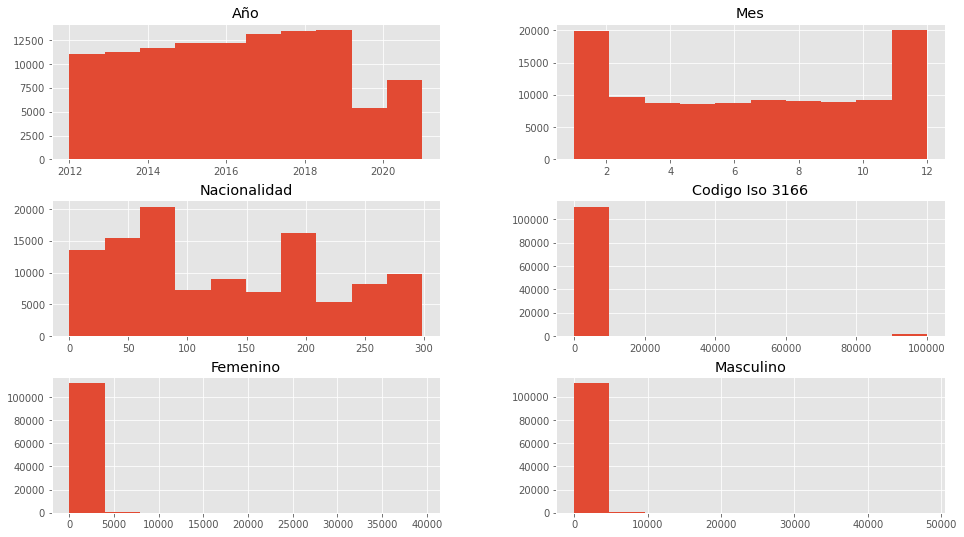

In [138]:
df_entrada.drop(['Total'],1).hist()
plt.show()

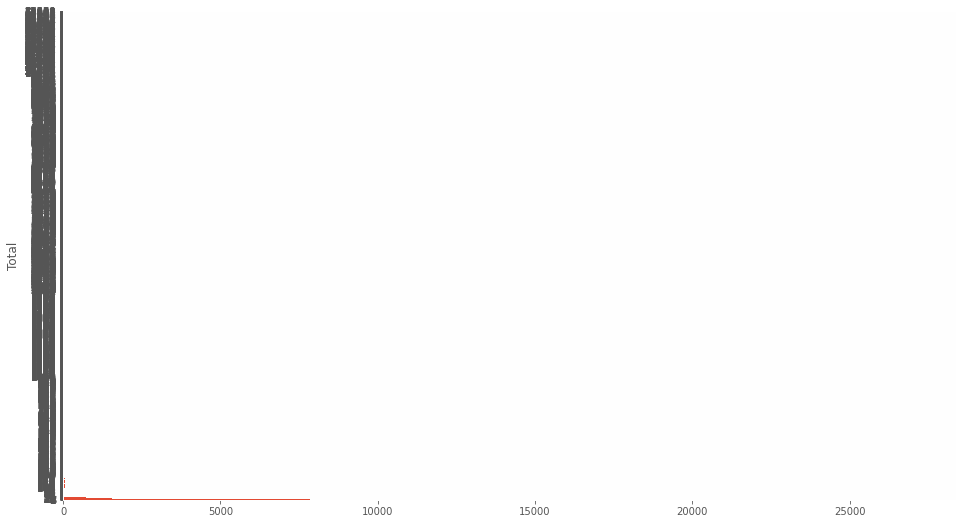

In [139]:
df_entrada.groupby('Total').size().plot.barh()

#P3. Algoritmo de k-means (30%)

##P3.1 gráfica elbow o de codo (20%)

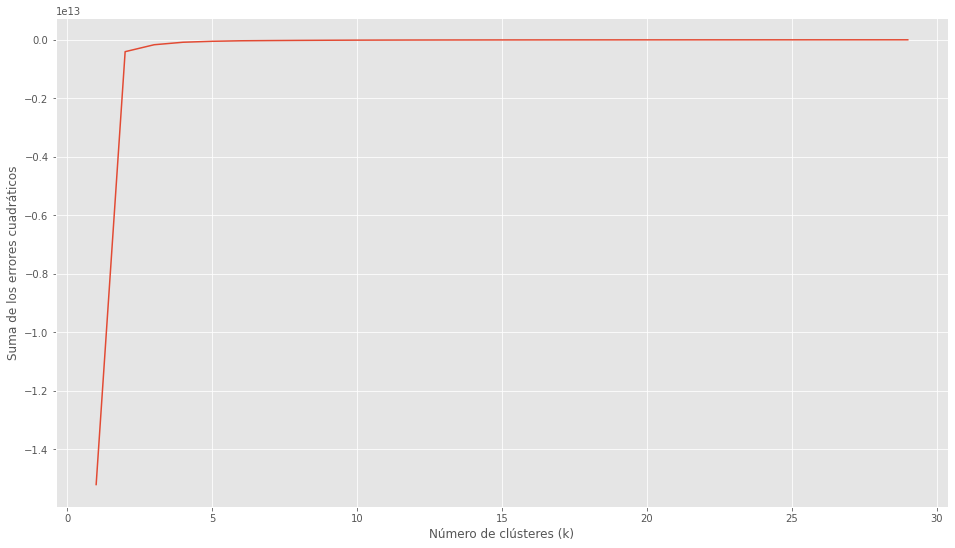

In [160]:
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_entrada).score(df_entrada) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

##P3.2 buscando los centroides (30%)

In [141]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_entrada)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[2.01627195e+03 6.49989911e+00 1.31078923e+02 4.26433431e+02
  3.09459507e+01 4.64399798e+01 7.73907090e+01]
 [2.01610839e+03 6.60872439e+00 1.63852611e+02 9.99990000e+04
  4.91077330e+00 8.62458691e+00 1.35366821e+01]
 [2.01702410e+03 6.83433735e+00 1.48783133e+02 7.13542169e+02
  7.02826807e+03 9.66007831e+03 1.66887139e+04]
 [2.01804000e+03 6.72000000e+00 2.95000000e+02 8.62000000e+02
  2.89332000e+04 2.99893600e+04 5.89238400e+04]
 [2.01636612e+03 6.58076095e+00 1.12243360e+02 4.84715004e+02
  2.73257430e+03 3.87426346e+03 6.60694042e+03]]


##P3.3 Etiquetado de datos. (20%)

In [142]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_entrada)   #generamos las etiquetas de cada clouster
df_entrada['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original
df_entrada.insert(0, 'Indefinido', dates)           #%% Añadimos la columna de fecha

In [143]:
df_entrada.head(10)

,Indefinido,Año,Mes,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Total,label
0,NaN,2012,1,110,99999,1,0,1,1
1,NaN,2012,1,2,8,1,2,3,0
2,NaN,2012,1,3,276,11,16,27,0
3,NaN,2012,1,3,276,1,1,2,0
4,NaN,2012,1,3,276,63,102,165,0
5,NaN,2012,1,3,276,22,23,45,0
6,NaN,2012,1,3,276,27,48,75,0
7,NaN,2012,1,3,276,7,4,11,0
8,NaN,2012,1,3,276,1,1,2,0
9,NaN,2012,1,3,276,8,21,29,0


##P3.4 Representación gráfica de los clústeres k-means.(20%)

---
Una vez con los datos etiquetados, generar gráficamente en dos dimensiones el clustering realizado por k-means, usar dos variables


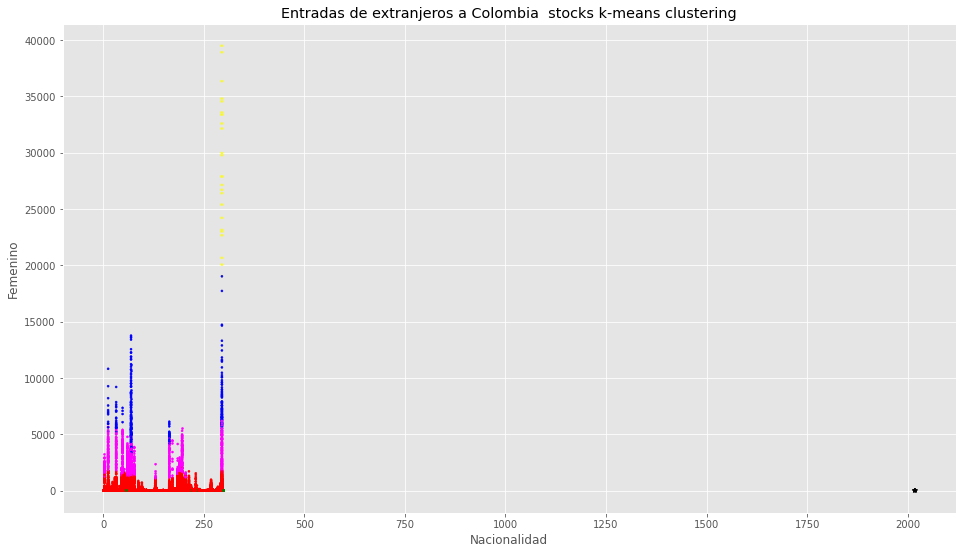

In [148]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Nacionalidad')
plt.ylabel('Femenino')
plt.title('Entradas de extranjeros a Colombia  stocks k-means clustering')
plt.show()

##P3.5 exportar el Dataset con los labels (10%)

#P4.algoritmo de machine Learning  (30%)

---

Seleccione un algoritmo (regresión lineal ó regresión logistica ó arboles de clasificación) que tenga la mejor inferencia

##P4.1 Preparación de los datos para el entrenamiento del modelo (10%)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to u

IndexError: ignored

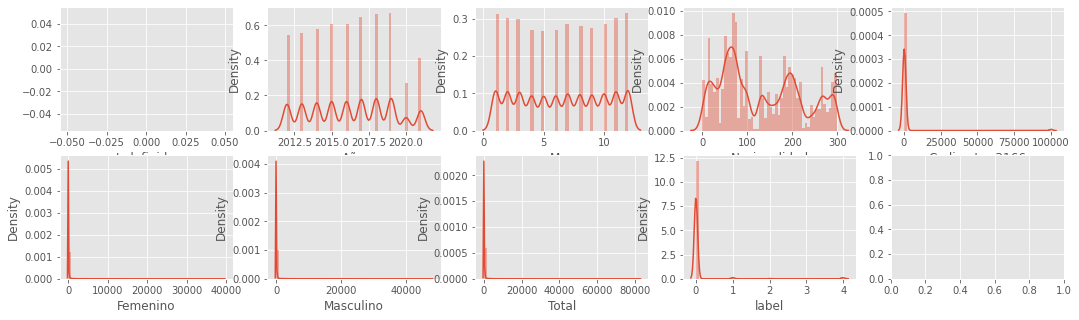

In [145]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,5))

col = df_entrada.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(df_entrada[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

##P4.2 Dividir los datos en conjuntos de entrenamiento (X %) y pruebas (X %) (30%)

In [ ]:
X = df_entrada.drop(['Año','Femenino','Masculino'], axis=1)
y = df_entrada.Femenino

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.20)

##P4.3 Entrenando el modelo (20%)

In [147]:
#from sklearn.linear_model import LogisticRegression
#modelIA = LogisticRegression(multi_class='multinomial',solver ='lbfgs',max_iter=400, penalty='l2', C=1.0)
#modelIA.fit(x_train, y_train)

##P4.4 Evaluación del modelo (40%)


##P4.5 la predicción es superior a 80%???